IMPORTING LIBRARIES

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING CSV

In [132]:
eq_df = pd.read_csv('C:\\Users\\Gunjan\\Desktop\\DAI-101\\ASS-1\\earthquake_1995-2023.csv')

In [133]:
eq_df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [134]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

DATA CLEANING 

In [135]:
eq_df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [136]:
#dropping alert, country and continent coloumns as they have many null values
eq_df=eq_df.drop(["alert","continent","country"],axis=1)
eq_df=eq_df.dropna()
eq_df.isnull().sum()

title        0
magnitude    0
date_time    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
dtype: int64

In [137]:
#dropping duplicate values in title and date_time coloumns
eq_df.drop_duplicates(subset=["title","date_time"])

eq_df.drop(["cdi","net","nst"],axis=1)

,title,magnitude,date_time,mmi,tsunami,sig,dmin,gap,magType,depth,latitude,longitude,location
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,4,0,657,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu"
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,6,0,775,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador"
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,5,0,899,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina"
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,1,860,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska"
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,5,1,820,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,9,0,776,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia"
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,4,0,912,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia"
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,6,0,732,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste"
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,9,0,670,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece"


In [138]:
eq_df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,6.940694,3.607646,6.041247,0.321932,848.477867,194.620724,1.110108,20.846368,72.776374,4.452511,51.737621
std,0.439305,3.334791,1.422488,0.467452,302.565066,239.547887,2.065554,24.439348,127.460999,26.567605,117.170474
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.373500,-71.684300
50%,6.800000,4.000000,6.000000,0.000000,744.500000,0.000000,0.000000,18.000000,29.000000,-2.330500,107.791000
75%,7.100000,7.000000,7.000000,1.000000,874.750000,404.500000,1.515250,26.900000,53.142500,25.675750,148.217500
max,9.100000,9.000000,10.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


UNIVARIATE ANALYSIS

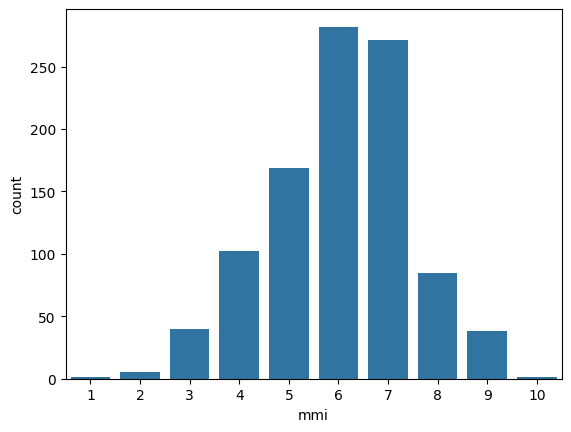

In [139]:
'''mmi - is The maximum estimated instrumental intensity for the event'''
'''sig - is A number describing how significant the event is. Larger numbers
indicate a more significant event. This value is determined on a number of
factors, including: magnitude, maximum MMI, felt reports, and estimated impact'''

#analysing mmi counts
sns.barplot(x=eq_df.mmi.value_counts().index,y=eq_df.mmi.value_counts())
plt.show()
#maximum mmi count is for mmi = 6 and 7

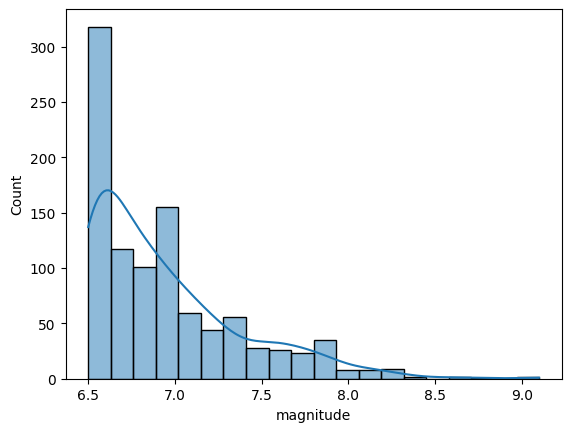

In [140]:
#analysing magnitude count
sns.histplot(eq_df.magnitude,bins=20,kde=True)
plt.show()
#data with resoect to magnitude is unimodal with peak at magnitude = 6.625

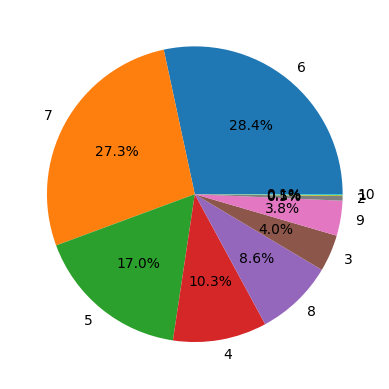

In [141]:
#analysing mmi vlues with pie chart
plt.pie(labels=eq_df.mmi.value_counts().index,x=eq_df.mmi.value_counts(),autopct="%1.1f%%")
plt.show()
#mmi values are maximum on 6 and 7

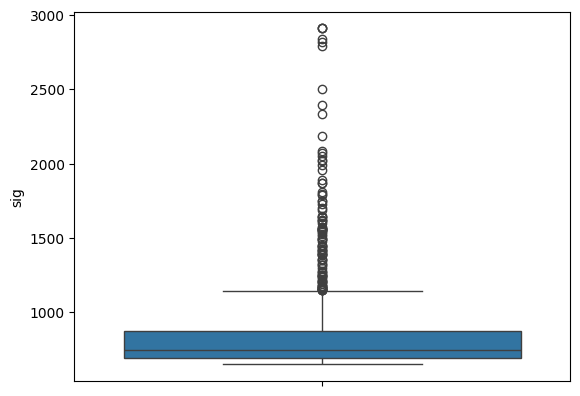

In [142]:
#analysing sig with boxplot
sns.boxplot(eq_df.sig)
plt.show()
#there are many outliers in sig coloumn

BIVARIATE ANALYSIS

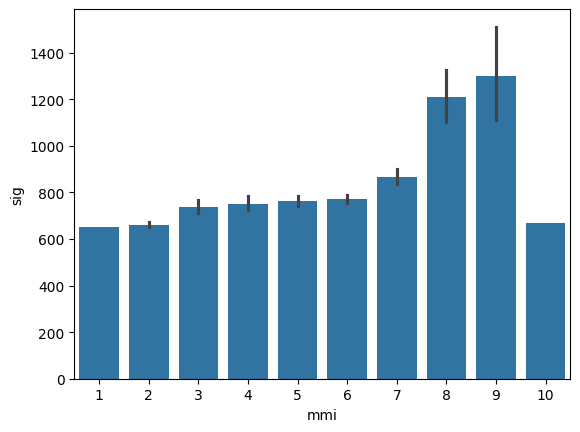

In [148]:
#analysing sig with mmi
sns.barplot(x=eq_df.mmi,y=eq_df.sig,estimator="mean")
plt.show()
#average sig is highest for mmi = 9

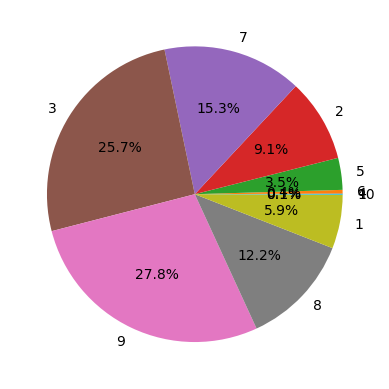

In [165]:
#ploting pie plot for maximum percentage value
plt.pie(labels=eq_df.mmi.unique(),x=eq_df.sig.groupby(eq_df.mmi).sum(),autopct="%1.1f%%")
plt.show()
#maximum share of sig coloumn is by mmi = 9 is 27.8%

[]

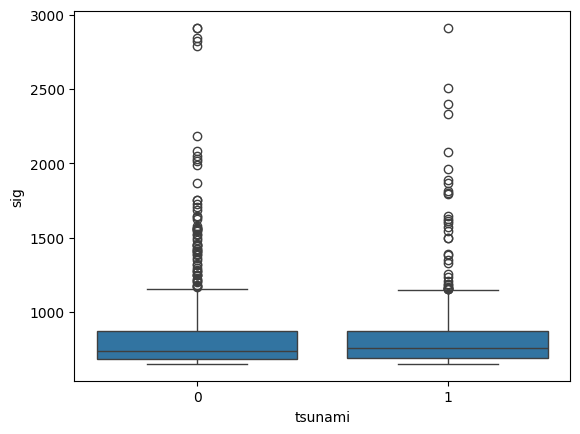

In [166]:
#boxplot for sig according to tsunami yes or no
sns.boxplot(x=eq_df.tsunami, y=eq_df.sig)
plt.plot()
#The IQR, median of sig is almost same for no and yes tsunami sub-groups. there are more outliers in no tsunami

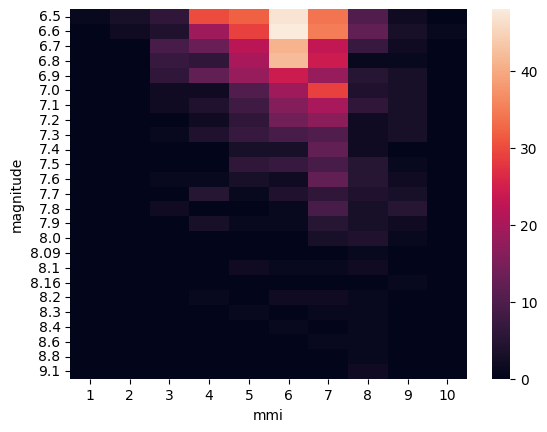

In [167]:
#analysing mmi with magnitude as heatmap
sns.heatmap(pd.crosstab(eq_df.magnitude, eq_df.mmi))
plt.show()
#mmi = 6 is showing least magnitude earthquakes, while higher mmi coresponds to higher magnitude earthquakes

MULTIVARIATE ANALYSIS

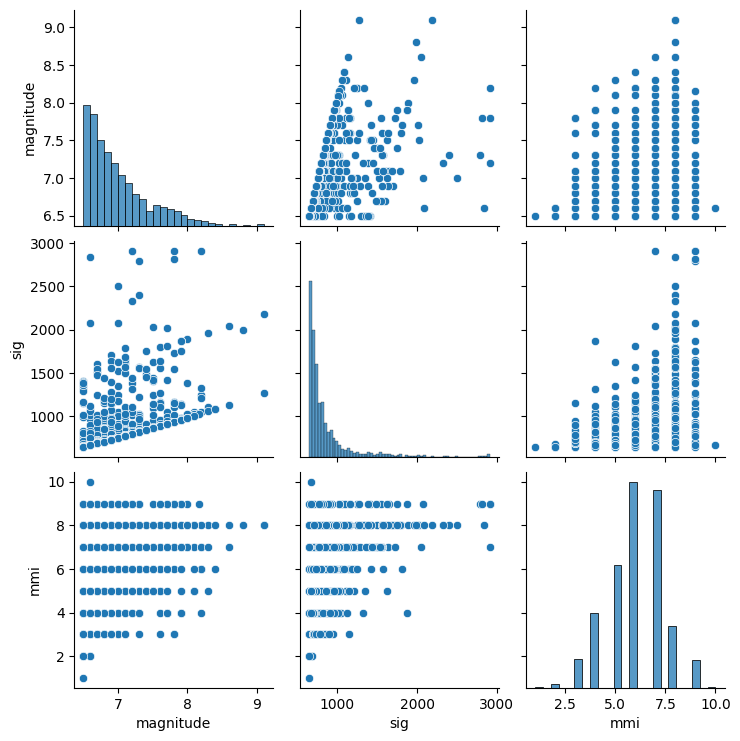

In [168]:
sns.pairplot(eq_df[["magnitude","sig","mmi"]])
plt.show()